# Passengers of the Titanic ship

This is exercise 1 of exchange student Phung Cao Thi Ngoc

## Library Declare

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## EXERCISE 1 — Data Preparation

### 1. Load the Titanic dataset from the provided URL

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

### 2. Display the first rows of the dataset and basic data information (head(), info(), describe()).

In [3]:
display(df.head()) # Show the first 5 rows of the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df.info())  # Print summary info about the dataframe (columns, types, missing values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
display(df.describe(include="all")) # Show statistical summary of all columns (numeric + categorical)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- count: number of non-null values / số lượng giá trị không bị thiếu
- unique: number of distinct values / số giá trị khác nhau
- top: most frequent value / giá trị xuất hiện nhiều nhất
- freq: frequency of top value / tần suất xuất hiện
- mean: average value / giá trị trung bình
- std: standard deviation / độ lệch chuẩn
- min: smallest value / giá trị nhỏ nhất
- 25%, 50%, 75%: quartiles / các mốc phân vị
- max: largest value / giá trị lớn nhất

### 3. Select the following columns for analysis: Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

In [6]:
cols = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
# Select only the columns needed for analysis
df = df[cols] # Keep only these selected columns in the dataframe
display(df.head()) # Show the first 5 rows to verify the selected columns

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 4. Handle missing values

#### 4.a. Fill missing Age with the median age.

In [7]:
median_age = df["Age"].median() # Calculate the median age from the Age column
df["Age"].fillna(median_age, inplace=True) # Replace missing Age values with the median age
print ("Median Age of this dataset")
print(median_age)


Median Age of this dataset
28.0


/tmp/ipython-input-3591283926.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(median_age, inplace=True) # Replace missing Age values with the median age


#### 4.b. Fill missing Embarked with the most frequent value (mode).

In [8]:
mode_embarked = df["Embarked"].mode()[0] # Find the most frequent value (mode) in the Embarked column
df["Embarked"].fillna(mode_embarked, inplace=True) # Fill missing Embarked values with the mode
print ("most frequent value Embarked (mode) of this dataset")
print(mode_embarked)

most frequent value Embarked (mode) of this dataset
S


/tmp/ipython-input-1749910735.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(mode_embarked, inplace=True) # Fill missing Embarked values with the mode


### 5. Dataset ready

In [9]:
display(df.isnull().sum())
display(df.head())

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## EXERCISE 2 — Building a Decision Tree Model

### 1. Encode categorical variables (Sex, Embarked) using one-hot encoding.


In [10]:
df_encoded = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)
# Convert categorical columns (Sex, Embarked) into one-hot encoded numeric columns

display(df_encoded.head()) # Show the first 5 rows of the encoded dataframe

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


### 2. Split the data into features (X) and label (y = "Survived").

In [11]:
X = df_encoded.drop("Survived", axis=1) # X contains all input features except the target column "Survived"
y = df_encoded["Survived"] # y contains only the target variable "Survived"

### 3. Use train_test_split to divide the dataset into 80% training and 20% testing sets.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Split the dataset: 80% for training, 20% for testing (test_size=0.2)
# random_state=42 ensures the split is always the same
# random_state=42 is used to make the data split reproducible


### 4. Build a decision tree classifier using DecisionTreeClassifier from scikit-learn.
- Set a random_state for reproducibility.
- Optionally limit the tree depth.

In [13]:
model_dt = DecisionTreeClassifier(
    random_state=42,  # ensures reproducible results
    max_depth=4       # limits tree depth to reduce overfitting
)

### 5. Train the model on the training set.

In [14]:
model_dt.fit(X_train, y_train)  # Train the model using the training data

DecisionTreeClassifier(max_depth=4, random_state=42)

- criterion: measure for split quality
- splitter: chooses best feature
- max_depth: limit tree depth
- min_samples_split: min samples to split
- min_samples_leaf: min samples per leaf
- min_weight_fraction_leaf: weighted sample fraction
- max_features: number of features to consider
- random_state: reproducibility
- max_leaf_nodes: limit leaf nodes
- min_impurity_decrease: minimum impurity for split
- class_weight: handle imbalanced classes
- ccp_alpha: pruning parameter
- monotonic_cst: monotonic constraints


### 6. Evaluate the model using:
- Accuracy
- Precision
- Recall
- F1-score

In [15]:
y_pred = model_dt.predict(X_test) # Use the trained model to predict labels for the test set

acc = accuracy_score(y_test, y_pred) # Calculate accuracy score
prec = precision_score(y_test, y_pred) # Calculate precision score
rec = recall_score(y_test, y_pred) # Calculate recall score
f1 = f1_score(y_test, y_pred) # Calculate F1-score (harmonic mean of precision & recall)
clas = classification_report(y_test, y_pred) # Generate a full classification report

print(f"Accuracy:  {acc:.6}")
print(f"Precision: {prec:.6f}")
print(f"Recall:    {rec:.6f}")
print(f"F1-score:  {f1:.6f}")
print(clas)


Accuracy:  0.798883
Precision: 0.839286
Recall:    0.635135
F1-score:  0.723077
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



### 7. Make predictions on the test set and interpret the evaluation results.

In [16]:
print("Predicted:", y_pred[:10]) # Print the first 10 predicted labels
print("Actual:", list(y_test[:10])) # Print the first 10 actual (true) labels from the test set

Predicted: [0 0 0 1 1 1 1 0 1 1]
Actual: [1, 0, 0, 1, 1, 1, 1, 0, 1, 1]


## EXERCISE 3 — Data Visualization
- Create clear, labeled plots using matplotlib (and optionally seaborn)
- Prepare the following visualizations

### 1. Bar plot: Survival rate by sex (male vs female).

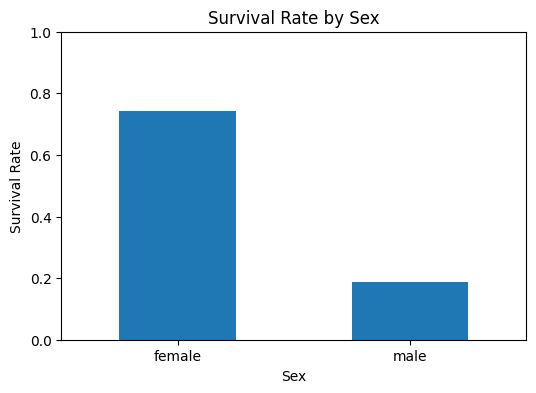

Survival rate by sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [17]:
survival_by_sex = df.groupby("Sex")["Survived"].mean() # Calculate survival rate for each sex (female/male)

plt.figure(figsize=(6,4)) # Create a figure with custom size
survival_by_sex.plot(kind="bar") # Plot bar chart of survival rates

plt.title("Survival Rate by Sex") # Set title and axis labels
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)  # Limit y-axis from 0 to 1 because this is a percentage
plt.xticks(rotation=0) # Keep x labels horizontal
plt.show() # Display the plot

print("Survival rate by sex:") # Print survival rates for each sex
print(survival_by_sex)

### 2. Bar plot: Survival rate by passenger class (Pclass).

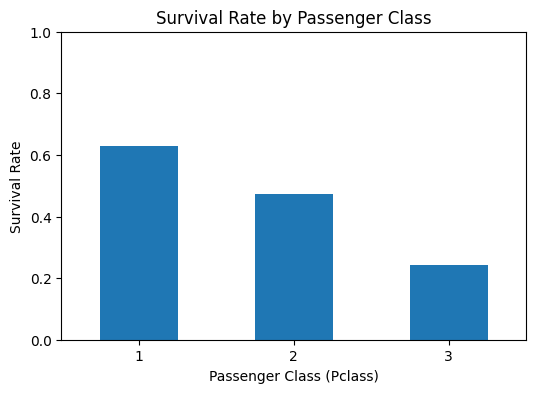

Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [18]:
survival_by_pclass = df.groupby("Pclass")["Survived"].mean() # Calculate survival rate for each passenger class (1, 2, 3)


plt.figure(figsize=(6,4)) # Create a figure with custom size
survival_by_pclass.plot(kind="bar") # Plot a bar chart of survival rates by class

plt.title("Survival Rate by Passenger Class") # Add title and axis labels
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Survival Rate")
plt.ylim(0, 1) # Limit Y-axis to range 0–1
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.show()

print("Survival rate by Pclass:") # Print survival rates for each class
print(survival_by_pclass)

### 3. Histogram: Age distribution of survivors vs non-survivors.

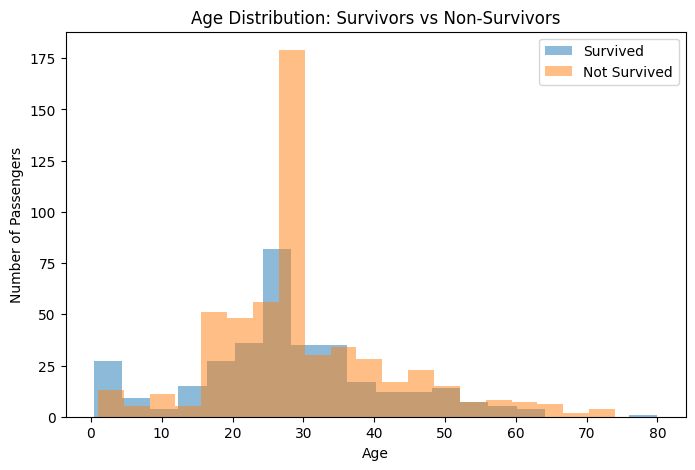

In [19]:
survived_ages = df[df["Survived"] == 1]["Age"] # Select Age values of passengers who survived (Survived = 1)
not_survived_ages = df[df["Survived"] == 0]["Age"] # Select Age values of passengers who did not survive (Survived = 0)

plt.figure(figsize=(8,5)) # Create figure with custom size
plt.hist(survived_ages, bins=20, alpha=0.5, label="Survived") # Plot histogram of ages for survivors
plt.hist(not_survived_ages, bins=20, alpha=0.5, label="Not Survived")

plt.title("Age Distribution: Survivors vs Non-Survivors") # Add title and axis labels
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

### 4. (Optional) Bar plot: Survival rate by port of embarkation (Embarked).

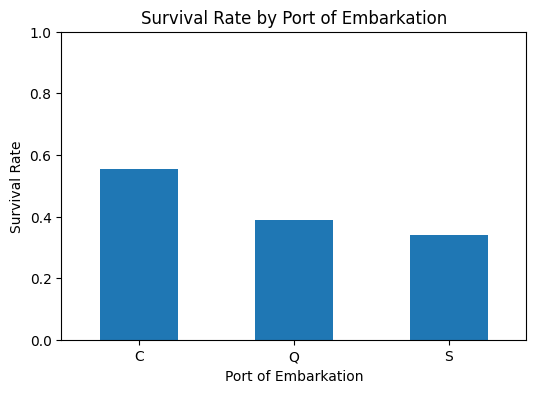

Survival rate by Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [20]:
survival_by_embarked = df.groupby("Embarked")["Survived"].mean() # Calculate survival rate for each embarkation port (C, Q, S)

plt.figure(figsize=(6,4)) # Create figure size
survival_by_embarked.plot(kind="bar") # Plot bar chart of survival rates by embarkation port

plt.title("Survival Rate by Port of Embarkation") # Add title and axis labels
plt.xlabel("Port of Embarkation")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

print("Survival rate by Embarked:")
print(survival_by_embarked)

## EXERCISE 4 — Model Evaluation and Interpretation

#### 1. Generate a confusion matrix for your trained decision tree model.

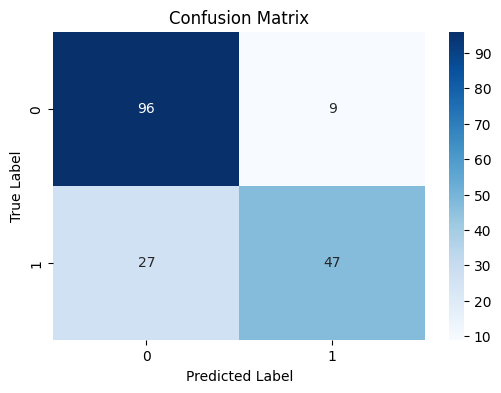

Confusion Matrix:
[[96  9]
 [27 47]]


In [21]:
y_pred = model_dt.predict(X_test) # Predict labels for the test set
cm = confusion_matrix(y_test, y_pred) # Compute the confusion matrix

plt.figure(figsize=(6,4)) # Create figure size for the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # Plot the confusion matrix as a heatmap
plt.title("Confusion Matrix") # Add title and axis labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Confusion Matrix:")
print(cm)

### 2. Explain what the confusion matrix shows — how many passengers were correctly and incorrectly classified.

- The confusion matrix shows how well the model classified the passengers:
- True Negatives (TN = 96)
- 96 passengers who did not survive were correctly predicted as not survived.

- False Positives (FP = 9)
- 9 passengers who did not survive were incorrectly predicted as survived.

- False Negatives (FN = 27)
- 27 passengers who survived were incorrectly predicted as not survived.
- This is important because the model failed to identify some actual survivors.

- True Positives (TP = 47)
- 47 passengers who survived were correctly predicted as survived.

- Interpretation:
The model performs reasonably well, but the number of false negatives (27) is relatively high. This means the model sometimes fails to recognize passengers who actually survived. Improving features or tuning hyperparameters may reduce these errors.

### 3. Visualize the trained decision tree using plot_tree.

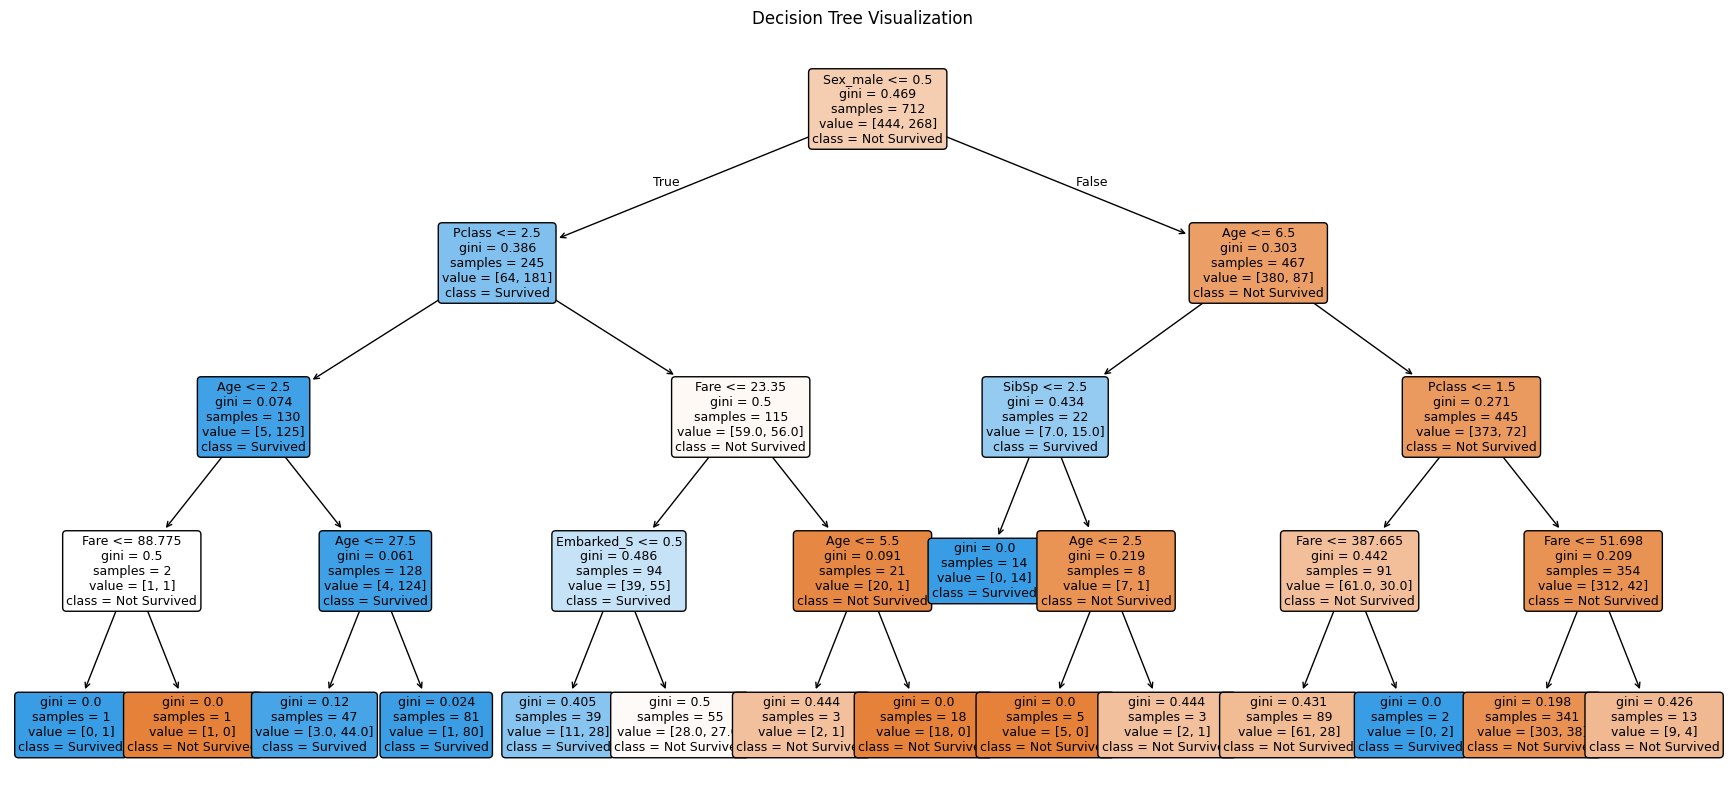

In [22]:
plt.figure(figsize=(22,10)) # Create a large figure to display the tree clearly
plot_tree( # Plot the decision tree with feature names and class labels
    model_dt,
    feature_names=X.columns, # Tên các đặc trưng
    class_names=["Not Survived", "Survived"], # Nhãn lớp
    filled=True, # Tô màu node theo lớp
    rounded=True, # Bo góc các node
    fontsize=9 # Cỡ chữ
)
plt.title("Decision Tree Visualization")
plt.show()

### 4. Identify and briefly discuss the most important features that contribute to survival predictions.

=== Feature Importance ===
Sex_male      0.579608
Pclass        0.200498
Fare          0.081064
Age           0.078872
SibSp         0.046059
Embarked_S    0.013900
Parch         0.000000
Embarked_Q    0.000000
dtype: float64


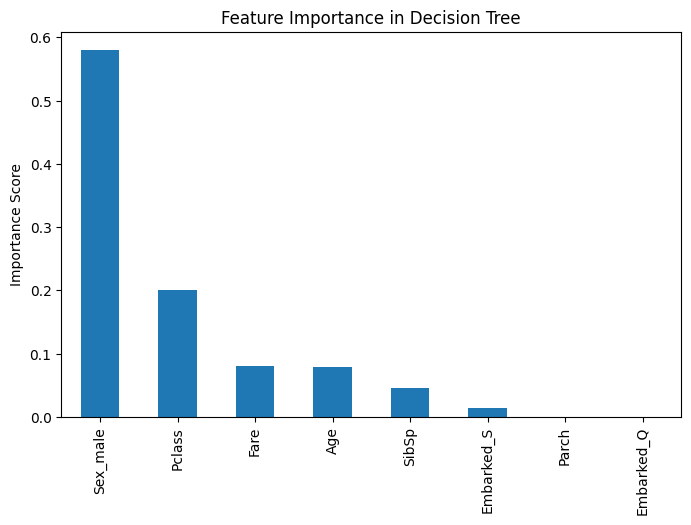

In [23]:
importances = model_dt.feature_importances_ # Get importance scores for each feature from the trained model
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
# Create a Series with feature names and sort them by importance

print("=== Feature Importance ===")
print(feature_importance) # Print the importance values

plt.figure(figsize=(8,5))
feature_importance.plot(kind="bar") # Plot the feature importance as a bar chart
plt.title("Feature Importance in Decision Tree") # Add title and label
plt.ylabel("Importance Score")
plt.show()